# Clustering
The dating profiles

### Importing Libraries and Data

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

In [2]:
# Loading in the cleaned DF
with open("mechanic_profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df

,Bios,Loation,Qualification,Specialisation
0,Passionate analyst. Explorer. Hipster-friendly problem solver. Freelance music geek. Social media advocate. Reader.,5,3,1
1,Twitter fanatic. Devoted web fanatic. Zombie evangelist. Travel aficionado. Bacon lover.,5,7,3
2,Total alcohol practitioner. Social media buff. Evil beer expert. Devoted analyst. Problem solver. Student.,2,0,2
3,Extreme twitter advocate. Hardcore internet junkie. Entrepreneur. Friend of animals everywhere.,4,6,6
4,Problem solver. Devoted introvert. Food geek. Avid writer. Thinker. Troublemaker. Friend of animals everywhere.,7,2,8
...,...,...,...,...
6160,Lifelong zombie junkie. Friendly travel buff. Coffeeaholic. Internet enthusiast.,7,5,3
6161,Total introvert. Tv specialist. Pop culture ninja. Web lover. Subtly charming twitter advocate. Explorer.,3,1,8
6162,Friendly zombie specialist. Avid bacon expert. Tv junkie. Alcohol guru. Food aficionado.,6,7,6
6163,Wannabe coffee practitioner. Troublemaker. Communicator. Friendly travel advocate. Reader. Thinker.,7,7,3


## Scaling the Categories

In [3]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Loation,Qualification,Specialisation
0,Passionate analyst. Explorer. Hipster-friendly problem solver. Freelance music geek. Social media advocate. Reader.,0.555556,0.333333,0.111111
1,Twitter fanatic. Devoted web fanatic. Zombie evangelist. Travel aficionado. Bacon lover.,0.555556,0.777778,0.333333
2,Total alcohol practitioner. Social media buff. Evil beer expert. Devoted analyst. Problem solver. Student.,0.222222,0.000000,0.222222
3,Extreme twitter advocate. Hardcore internet junkie. Entrepreneur. Friend of animals everywhere.,0.444444,0.666667,0.666667
4,Problem solver. Devoted introvert. Food geek. Avid writer. Thinker. Troublemaker. Friend of animals everywhere.,0.777778,0.222222,0.888889
...,...,...,...,...
6160,Lifelong zombie junkie. Friendly travel buff. Coffeeaholic. Internet enthusiast.,0.777778,0.555556,0.333333
6161,Total introvert. Tv specialist. Pop culture ninja. Web lover. Subtly charming twitter advocate. Explorer.,0.333333,0.111111,0.888889
6162,Friendly zombie specialist. Avid bacon expert. Tv junkie. Alcohol guru. Food aficionado.,0.666667,0.777778,0.666667
6163,Wannabe coffee practitioner. Troublemaker. Communicator. Friendly travel advocate. Reader. Thinker.,0.777778,0.777778,0.333333


## Vectorizing the Bios

In [4]:
# Instantiating the Vectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [5]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,award,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6161,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6162,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6163,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
new_df

,Loation,Qualification,Specialisation,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.555556,0.333333,0.111111,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.555556,0.777778,0.333333,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.222222,0.000000,0.222222,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.444444,0.666667,0.666667,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.777778,0.222222,0.888889,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,0.777778,0.555556,0.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6161,0.333333,0.111111,0.888889,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6162,0.666667,0.777778,0.666667,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6163,0.777778,0.777778,0.333333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Performing PCA on the DF
Reducing the dimensionality of the dataset with Principal Component Analysis

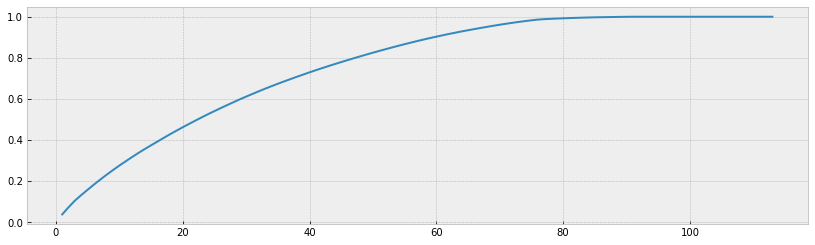

Number features: 78
Total Variance Explained: 0.9911467130530328


In [7]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [8]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

0.9897338446167763

## Hierarchical Agglomerative Clustering

### Finding the Optimum Number of Clusters

In [10]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

<ipython-input-10-e5c1199d955c>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(cluster_cnt):


### Plotting the Evaluation Scores for Different Evaluation Metrics

In [11]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Calinski-Harabasz
A higher scores means better defined clusters.  Aiming for a high score

Max Value:
Cluster #    Cluster Score
3     143.663995

Min Value:
Cluster #     Cluster Score
19      78.499428


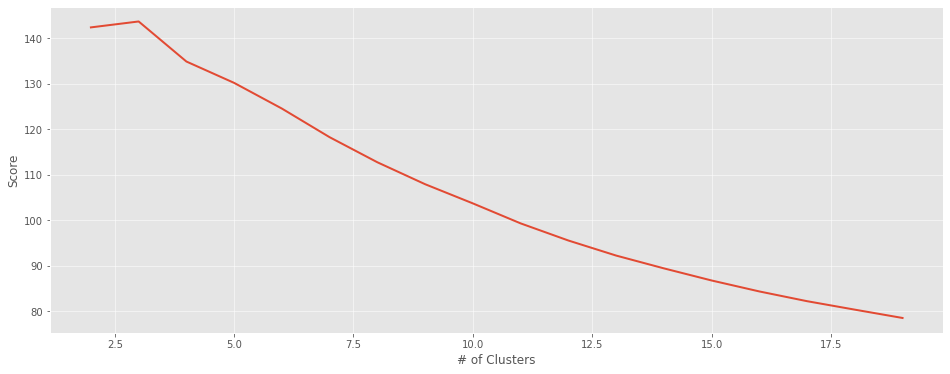

In [12]:
plot_evaluation(ch_scores)

### Silhouette Coefficient
A higher score means better defined clusters. Aim for high score.

Max Value:
Cluster #    Cluster Score
2       0.069925

Min Value:
Cluster #    Cluster Score
3       0.027892


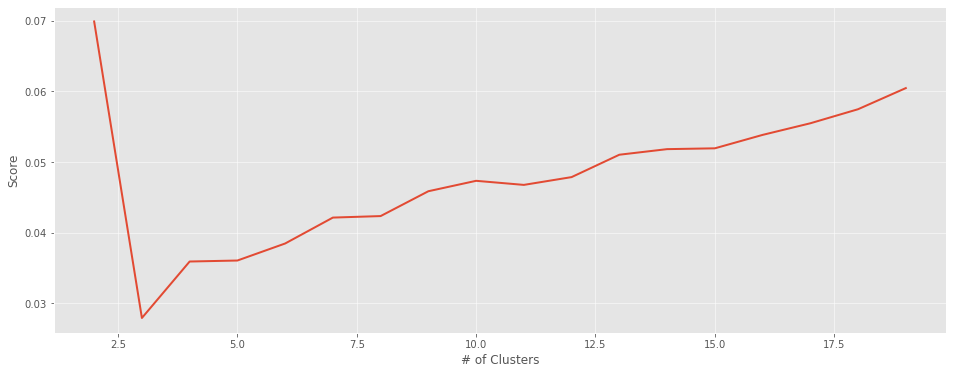

In [13]:
plot_evaluation(s_scores)

### Davies-Bouldin
A lower score is better.  Scores closer to zero are better.

Max Value:
Cluster #    Cluster Score
3       4.520744

Min Value:
Cluster #    Cluster Score
2       3.263912


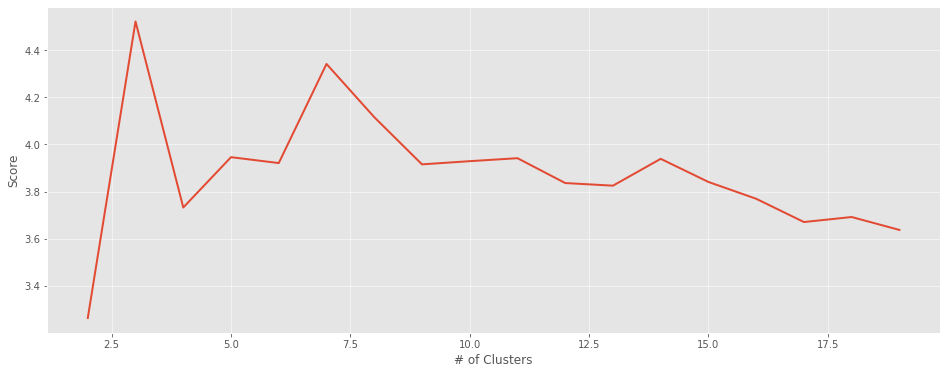

In [14]:
plot_evaluation(db_scores)

Based on two evaluation metrics, the best amount of clusters for this dataset is 12.

## Running the Final Clustering Algorithm

In [15]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=12)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

In [16]:
# Unscaling the categories then replacing the scaled values
df = df[['Bios']].join(pd.DataFrame(scaler.inverse_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Loation,Qualification,Specialisation
0,Passionate analyst. Explorer. Hipster-friendly problem solver. Freelance music geek. Social media advocate. Reader.,5.0,3.0,1.0
1,Twitter fanatic. Devoted web fanatic. Zombie evangelist. Travel aficionado. Bacon lover.,5.0,7.0,3.0
2,Total alcohol practitioner. Social media buff. Evil beer expert. Devoted analyst. Problem solver. Student.,2.0,0.0,2.0
3,Extreme twitter advocate. Hardcore internet junkie. Entrepreneur. Friend of animals everywhere.,4.0,6.0,6.0
4,Problem solver. Devoted introvert. Food geek. Avid writer. Thinker. Troublemaker. Friend of animals everywhere.,7.0,2.0,8.0
...,...,...,...,...
6160,Lifelong zombie junkie. Friendly travel buff. Coffeeaholic. Internet enthusiast.,7.0,5.0,3.0
6161,Total introvert. Tv specialist. Pop culture ninja. Web lover. Subtly charming twitter advocate. Explorer.,3.0,1.0,8.0
6162,Friendly zombie specialist. Avid bacon expert. Tv junkie. Alcohol guru. Food aficionado.,6.0,7.0,6.0
6163,Wannabe coffee practitioner. Troublemaker. Communicator. Friendly travel advocate. Reader. Thinker.,7.0,7.0,3.0


In [17]:
# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

,Bios,Loation,Qualification,Specialisation,Cluster #
0,Passionate analyst. Explorer. Hipster-friendly problem solver. Freelance music geek. Social media advocate. Reader.,5.0,3.0,1.0,10
1,Twitter fanatic. Devoted web fanatic. Zombie evangelist. Travel aficionado. Bacon lover.,5.0,7.0,3.0,1
2,Total alcohol practitioner. Social media buff. Evil beer expert. Devoted analyst. Problem solver. Student.,2.0,0.0,2.0,5
3,Extreme twitter advocate. Hardcore internet junkie. Entrepreneur. Friend of animals everywhere.,4.0,6.0,6.0,8
4,Problem solver. Devoted introvert. Food geek. Avid writer. Thinker. Troublemaker. Friend of animals everywhere.,7.0,2.0,8.0,5
...,...,...,...,...,...
6160,Lifelong zombie junkie. Friendly travel buff. Coffeeaholic. Internet enthusiast.,7.0,5.0,3.0,1
6161,Total introvert. Tv specialist. Pop culture ninja. Web lover. Subtly charming twitter advocate. Explorer.,3.0,1.0,8.0,1
6162,Friendly zombie specialist. Avid bacon expert. Tv junkie. Alcohol guru. Food aficionado.,6.0,7.0,6.0,2
6163,Wannabe coffee practitioner. Troublemaker. Communicator. Friendly travel advocate. Reader. Thinker.,7.0,7.0,3.0,4


### Exporting the Clustered Profiles

In [18]:
with open("../clustered_profiles.pkl", "wb") as fp:
    pickle.dump(df, fp)

## Finding Users within their own Clusters
Sorting users so they match or are recommended to other similar users.

Example will be randomly using any of the clusters:

In [19]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

print("For Cluster Group #", rand_cluster)

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)

# Viewing the newly created DF
group

For Cluster Group # 7


,Bios,Loation,Qualification,Specialisation
988,Professional introvert. Bacon expert. Proud food junkie. Unable to type with boxing gloves on. Tv fanatic. Future teen idol. Coffee maven.,7.0,1.0,6.0
1003,Professional introvert. Bacon expert. Proud food junkie. Unable to type with boxing gloves on. Tv fanatic. Future teen idol. Coffee maven.,7.0,8.0,0.0
1018,Professional introvert. Bacon expert. Proud food junkie. Unable to type with boxing gloves on. Tv fanatic. Future teen idol. Coffee maven.,0.0,7.0,6.0
1033,Professional introvert. Bacon expert. Proud food junkie. Unable to type with boxing gloves on. Tv fanatic. Future teen idol. Coffee maven.,2.0,9.0,0.0
1048,Professional introvert. Bacon expert. Proud food junkie. Unable to type with boxing gloves on. Tv fanatic. Future teen idol. Coffee maven.,8.0,3.0,7.0
...,...,...,...,...
6095,Hardcore beer fanatic. Web specialist. Wannabe pop culture aficionado. Food guru. Unable to type with boxing gloves on.,6.0,5.0,0.0
6110,Hardcore beer fanatic. Web specialist. Wannabe pop culture aficionado. Food guru. Unable to type with boxing gloves on.,5.0,5.0,9.0
6125,Hardcore beer fanatic. Web specialist. Wannabe pop culture aficionado. Food guru. Unable to type with boxing gloves on.,1.0,0.0,2.0
6140,Hardcore beer fanatic. Web specialist. Wannabe pop culture aficionado. Food guru. Unable to type with boxing gloves on.,7.0,5.0,0.0


### Vectorizing the Bios only in the Selected Cluster

In [20]:
# Fitting the vectorizer to the Bios
cluster_x = vectorizer.fit_transform(group['Bios'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names())
cluster_v

,advocate,aficionado,alcohol,amateur,analyst,award,bacon,beer,boxing,buff,...,tvaholic,twitter,type,unable,unapologetic,wannabe,web,winning,with,zombie
988,0,0,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1003,0,0,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1018,0,0,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1033,0,0,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1048,0,0,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,0,1,0,0,0,0,0,1,1,0,...,0,0,1,1,0,1,1,0,1,0
6110,0,1,0,0,0,0,0,1,1,0,...,0,0,1,1,0,1,1,0,1,0
6125,0,1,0,0,0,0,0,1,1,0,...,0,0,1,1,0,1,1,0,1,0
6140,0,1,0,0,0,0,0,1,1,0,...,0,0,1,1,0,1,1,0,1,0


In [21]:
# Joining the vector DF and the original DF
group = group.join(cluster_v)

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
group

,Loation,Qualification,Specialisation,advocate,aficionado,alcohol,amateur,analyst,award,bacon,...,tvaholic,twitter,type,unable,unapologetic,wannabe,web,winning,with,zombie
988,7.0,1.0,6.0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1003,7.0,8.0,0.0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1018,0.0,7.0,6.0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1033,2.0,9.0,0.0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1048,8.0,3.0,7.0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,6.0,5.0,0.0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,1,0,1,0
6110,5.0,5.0,9.0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,1,0,1,0
6125,1.0,0.0,2.0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,1,0,1,0
6140,7.0,5.0,0.0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,1,0,1,0


### Finding Correlation among the Users

In [22]:
# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()

corr_group

,988,1003,1018,1033,1048,1063,1078,1093,1108,1123,...,5402,5417,5432,5447,5462,6095,6110,6125,6140,6155
988,1.000000,0.594025,0.530005,0.316154,0.984012,0.968241,0.697284,0.616359,0.850546,0.547512,...,0.275458,0.656429,0.761636,0.501174,0.534907,0.540621,0.786985,0.460218,0.574404,0.500562
1003,0.594025,1.000000,0.589243,0.882442,0.686826,0.740916,0.485971,0.943262,0.461453,0.979765,...,0.801115,0.128767,0.812921,0.558443,0.530543,0.866277,0.535305,0.129817,0.864872,0.081974
1018,0.530005,0.589243,1.000000,0.759290,0.628163,0.631929,0.951609,0.766013,0.827803,0.662031,...,0.614824,0.648497,0.363524,0.905856,0.886352,0.392352,0.745843,0.289250,0.355716,0.611292
1033,0.316154,0.882442,0.759290,1.000000,0.443707,0.496643,0.566629,0.928646,0.427443,0.935782,...,0.859138,0.112375,0.511388,0.673046,0.626220,0.677114,0.437683,0.048422,0.641498,0.131923
1048,0.984012,0.686826,0.628163,0.443707,1.000000,0.996048,0.758371,0.698685,0.860374,0.637661,...,0.403399,0.666538,0.808711,0.618042,0.639344,0.623231,0.850415,0.436361,0.649210,0.515846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,0.540621,0.866277,0.392352,0.677114,0.623231,0.677550,0.328859,0.739064,0.317832,0.798163,...,0.720456,0.131371,0.838186,0.472464,0.456455,1.000000,0.622679,0.464527,0.996729,0.274681
6110,0.786985,0.535305,0.745843,0.437683,0.850415,0.849008,0.842199,0.568511,0.819295,0.491541,...,0.461892,0.796463,0.652876,0.816783,0.825823,0.622679,1.000000,0.646775,0.617207,0.814575
6125,0.460218,0.129817,0.289250,0.048422,0.436361,0.410706,0.400513,0.200737,0.477058,0.131420,...,0.121622,0.509227,0.296839,0.319430,0.359433,0.464527,0.646775,1.000000,0.446974,0.852945
6140,0.574404,0.864872,0.355716,0.641498,0.649210,0.702318,0.308755,0.724100,0.317072,0.786373,...,0.690445,0.129615,0.865870,0.440899,0.428033,0.996729,0.617207,0.446974,1.000000,0.246788


## Finding the Top 10 Similar users
For a random dating profile

In [23]:
random_user = random.choice(corr_group.index)

print("Top 10 most similar users to User #", random_user, '\n')

top_10_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:11]

print(top_10_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_10_sim.index[0])

Top 10 most similar users to User # 2311 

          2311
4958  0.938624
1725  0.938145
4284  0.938003
3736  0.932425
3661  0.930210
4868  0.928777
3823  0.928777
5372  0.928375
3563  0.921854
4269  0.919010

The most similar user to User # 2311 is User # 4958
